In [9]:
### Binary classification movie reviews dataset

import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences #fixed length

# Parameters
vocab_size = 10000  # Vocabulary size unique words
max_len = 500  # Maximum length of review
embedding_dim = 32  # Dimension of embedding layer

# Load IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=
                                                                      vocab_size)

# Padding sequences to the same length

test_data = pad_sequences(test_data, maxlen=max_len)

# Load the word index dictionary and reverse it for interpretation 
#mapping from integer indices back to words

reverse_word_index = {value + 3: key for key, value in word_index.items()}

#reverse_word_index[0] = '<PAD>'
#reverse_word_index[1] = '<START>'

#reverse_word_index[2] = '<UNK>'
#reverse_word_index[3] = '<UNUSED>'

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
#flatten  convert the input tensor into a one-dimensional tensor

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid output for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 flatten_1 (Flatten)         (None, 16000)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               4096256   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 4416513 (16.85 MB)
Trainable params: 4416513 (16.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
history = model.fit(train_data, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 10s 60ms/step - loss: 0.5196 - accuracy: 0.7082 - val_loss: 0.3015 - val_accuracy: 0.8764
Epoch 2/10
157/157 [==============================] - 10s 61ms/step - loss: 0.1596 - accuracy: 0.9414 - val_loss: 0.3142 - val_accuracy: 0.8740
Epoch 3/10
157/157 [==============================] - 13s 84ms/step - loss: 0.0328 - accuracy: 0.9924 - val_loss: 0.3983 - val_accuracy: 0.8736
Epoch 4/10
157/157 [==============================] - 13s 84ms/step - loss: 0.0063 - accuracy: 0.9996 - val_loss: 0.4516 - val_accuracy: 0.8738
Epoch 5/10
157/157 [==============================] - 13s 85ms/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.4837 - val_accuracy: 0.8738
Epoch 6/10
157/157 [==============================] - 13s 84ms/step - loss: 9.9740e-04 - accuracy: 1.0000 - val_loss: 0.5084 - val_accuracy: 0.8728
Epoch 7/10
157/157 [==============================] - 13s 84ms/step - loss: 6.7519e-04 - accuracy: 1.0000 - val_loss: 0.5278 - val_a

In [12]:
results = model.evaluate(test_data, test_labels)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")


782/782 [==============================] - 8s 10ms/step - loss: 0.5806 - accuracy: 0.8644
Test Loss: 0.5806443691253662, Test Accuracy: 0.864359974861145


In [13]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

def predict_review(model, review):
    decoded_review = decode_review(review)
    print(f"Review: {decoded_review}")
    prediction = model.predict(np.array([review]))
    print("Prediction (0 = negative, 1 = positive): {:.2f}".format(prediction[0][0]))

# Test with a single review from the test set
predict_review(model, test_data[1])


Review: ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances ? the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere ? with sexual tension and psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and 

782/782 [==============================] - 7s 9ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     12500
           1       0.86      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



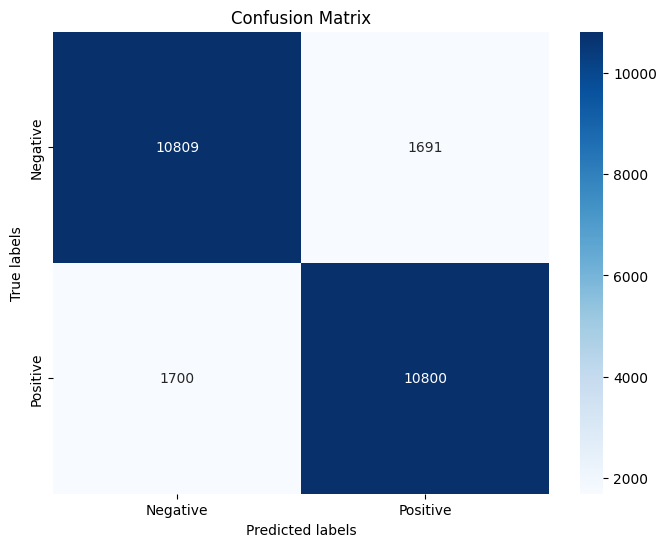

In [14]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Make predictions on test data
predictions = model.predict(test_data)
predictions = (predictions > 0.5)  # Convert probabilities to binary

# Classification report
print("Classification Report:")
print(classification_report(test_labels, predictions))


# Confusion matrix
cm = confusion_matrix(test_labels, predictions)
plot_confusion_matrix(cm, classes=['Negative', 'Positive'])


In [15]:
print(confusion_matrix(test_labels, predictions))

[[10809  1691]
 [ 1700 10800]]
